In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rows = 1000


dice_roll = pd.DataFrame({"Dice 1": [np.random.randint(1, 7) for i in range(rows)],
                         "Dice 2": [np.random.randint(1, 7) for i in range(rows)],
                          })
dice_roll["Sum"] = dice_roll["Dice 1"] + dice_roll["Dice 2"]
dice_roll["Product"] = dice_roll["Dice 1"] * dice_roll["Dice 2"]
dice_roll["Max"] = np.maximum(dice_roll["Dice 1"], dice_roll["Dice 2"])
dice_roll["Min"] = np.minimum(dice_roll["Dice 1"], dice_roll["Dice 2"])
dice_pair = [(dice_roll["Dice 1"][i], dice_roll["Dice 2"][i])
             for i in range(rows)]
# dice_roll.insert(0, "Dice Pair", (dice_roll["Dice 1"], dice_roll["Dice 2"]))
print(dice_pair)
dice_roll.insert(0, "Dice Pair", dice_pair)
dice_roll.drop(["Dice 1", "Dice 2"], axis=1, inplace=True)


dice_roll

[(4, 3), (4, 6), (2, 1), (2, 3), (5, 5), (5, 1), (4, 6), (4, 2), (5, 5), (6, 5), (6, 2), (3, 2), (2, 2), (4, 5), (1, 2), (2, 3), (1, 6), (5, 5), (1, 2), (5, 4), (1, 6), (5, 5), (4, 3), (5, 2), (6, 4), (5, 1), (5, 5), (1, 2), (1, 4), (4, 5), (1, 6), (4, 5), (5, 2), (2, 3), (5, 6), (5, 1), (4, 5), (4, 4), (2, 6), (2, 4), (4, 3), (2, 1), (6, 5), (5, 6), (3, 1), (4, 5), (2, 3), (5, 5), (3, 3), (3, 2), (5, 5), (5, 6), (6, 6), (2, 2), (2, 2), (4, 2), (5, 5), (1, 1), (4, 6), (4, 3), (2, 4), (2, 5), (2, 3), (3, 6), (6, 1), (1, 4), (5, 3), (5, 1), (5, 4), (6, 2), (2, 5), (1, 2), (6, 1), (3, 1), (5, 6), (2, 5), (2, 2), (6, 1), (4, 3), (5, 2), (5, 5), (6, 1), (2, 2), (4, 4), (3, 5), (3, 5), (2, 3), (4, 6), (1, 5), (3, 4), (5, 1), (3, 3), (4, 2), (4, 4), (2, 6), (1, 4), (1, 1), (3, 5), (4, 4), (4, 4), (3, 3), (5, 5), (3, 6), (1, 3), (4, 3), (5, 5), (5, 5), (1, 4), (6, 4), (4, 5), (1, 5), (3, 6), (2, 2), (6, 2), (4, 2), (6, 3), (6, 2), (3, 3), (4, 4), (1, 1), (5, 4), (4, 2), (1, 4), (2, 2), (4, 1),

,Dice Pair,Sum,Product,Max,Min
0,"(4, 3)",7,12,4,3
1,"(4, 6)",10,24,6,4
2,"(2, 1)",3,2,2,1
3,"(2, 3)",5,6,3,2
4,"(5, 5)",10,25,5,5
...,...,...,...,...,...
995,"(1, 1)",2,1,1,1
996,"(4, 2)",6,8,4,2
997,"(6, 3)",9,18,6,3
998,"(4, 1)",5,4,4,1


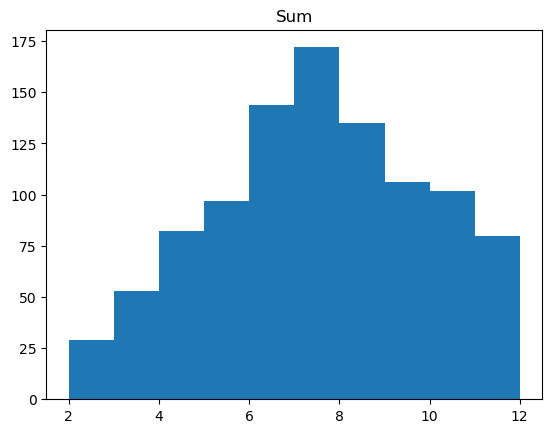

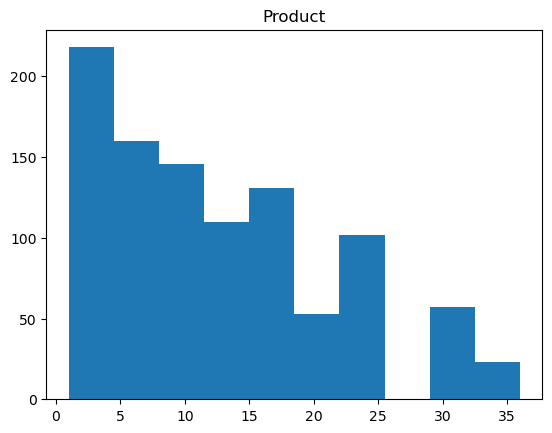

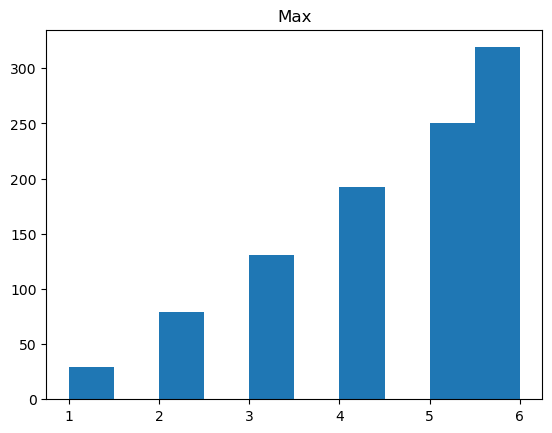

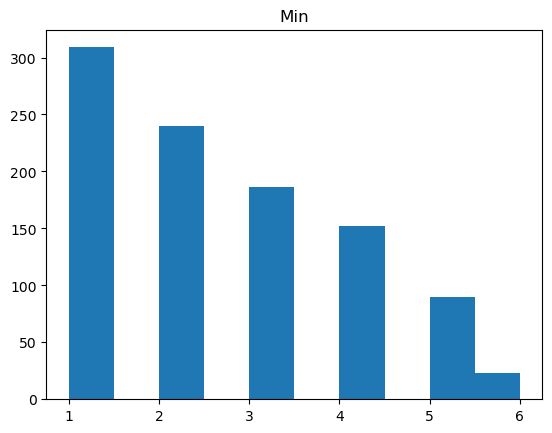

In [4]:
for index, column in enumerate(dice_roll.columns):
    if column == 'Dice Pair':
        continue
    plt.figure(index)
    plt.hist(dice_roll[column])
    # plt.xticks(ticks) #Not working as intended
    plt.title(column)

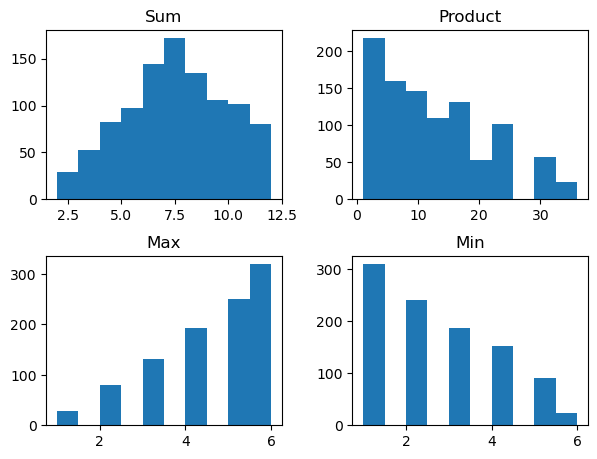

In [9]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=2)
column = 0
for row in axs:
    for ax in row:
        column += 1
        ax.hist(dice_roll.iloc[:, column])
        ax.title.set_text(dice_roll.columns[column])

# for index, column in enumerate(dice_roll.columns):
#     if column == 'Dice Pair':
#         continue
#     dice_roll[column].hist()
#     plt.title(column)

# Second Part of the Lab

In [6]:
from scipy.stats import norm
abc_profit = pd.read_csv('CompanyABCProfit.csv')

In [7]:
abc_profit

,Year,Profit(Rs '000)
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764
...,...,...
195,2016,988
196,2017,895
197,2018,-178
198,2019,543


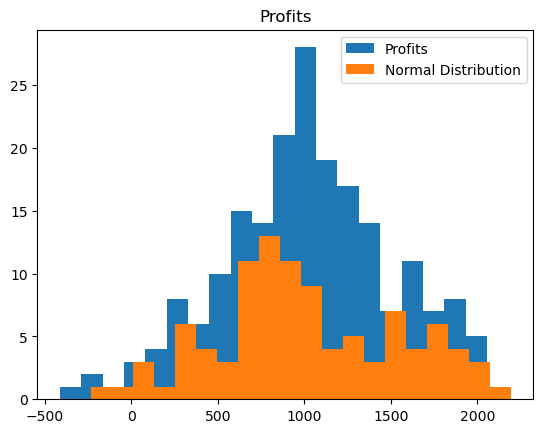

In [8]:
profits = abc_profit['Profit(Rs \'000)']

bins = 20
plt.hist(profits, bins=bins, label="Profits")
plt.title("Profits")
plt.hist(norm.rvs(loc=profits.median(), scale=500, size=100),
         bins=bins, label="Normal Distribution")
plt.legend()